In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

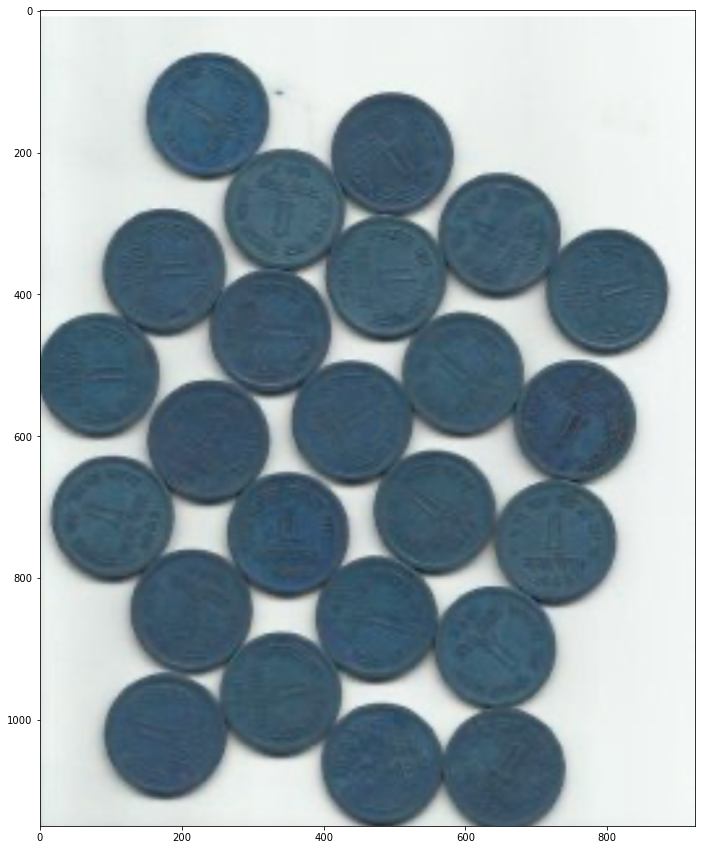

In [19]:
img = cv2.imread('pdfcoin.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(20,15))
plt.imshow(img)

ValueError: num must be 1 <= num <= 2, not 3

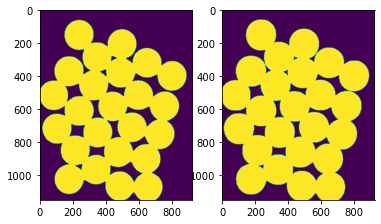

In [24]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)


# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(121), plt.imshow(opening)
plt.subplot(122), plt.imshow(sure_bg)
plt.subplot(123), plt.imshow(sure_fg)
plt.subplot(124), plt.imshow(unknown)



(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fabc6424e10>)

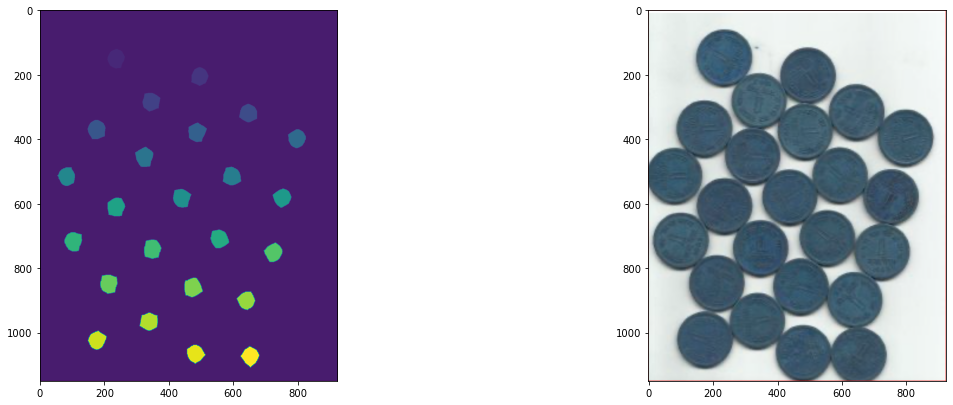

In [23]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers2[unknown==255] = 0

markers2 = cv2.watershed(img,markers)
img[markers2 == -1] = [255,0,0]

plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(markers2)
plt.subplot(222), plt.imshow(img)

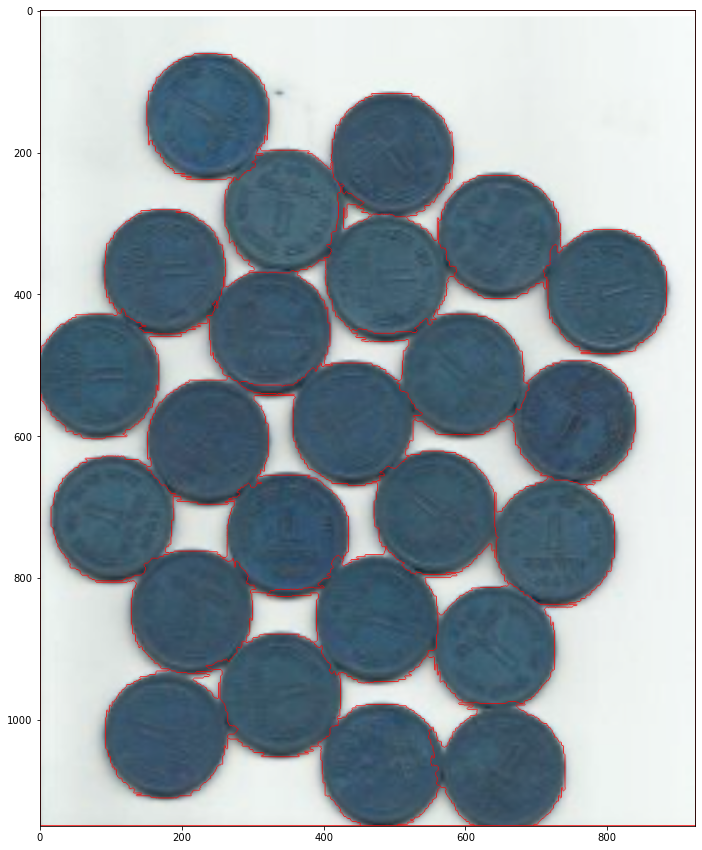

In [8]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure(figsize=(20,15))
plt.imshow(img)